# K-Means Clustering in Python

It is a clustering algorithm that targets to partition n number of observations into k clusters.

It is carried out in three steps-

+ **Initialisation** – K initial “means” (centroids) which are generated at random
+ **Assignment** – K clusters are created by picking up each observation with the nearest centroid
+ **Update** – The centroid of the clusters becomes the new mean Assignment and Update are repeated iteratively until convergence
The final result is the sum of squared errors is minimised between points and their respective centroids.

I will perform K-means on the very famous Iris Species Dataset which was used in **R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems**.








## Understanding the Data

Before moving ahead, the first thing to be kept in mind while having first hand look at the data

+ **Number of observations** - Ensuring same count pre (in the raw file) and post (after upload)
+ **Level of data** - which columns are required to identify a unique row?
+ **Data types** - If all data types are appropriate to work with and if there's a need for type casting 
+ **Nulls** - Presence of missing values and need for treatment 
+ General structure and integrity

### Load data and library dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
#Load the iris species dataset
iris =  pd.read_csv('iris.csv')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### Data Integrity Check & Summary

In [3]:
#Check no of records 
print("No. of observations:" + str(len(iris)) + "\n")

#Check the type of data 
print(str(type(iris)) + "\n")

#Check first and the last row to ensure full data is uploaded 
print(iris[::len(iris)-1])

#Check shape of the data
print("Shape of data:" + str(iris.shape) + "\n")

#Check summary of the data
print("Summary of data:" + str(iris.describe(include = 'object')) + "\n")

#Check data type of all columns 
print("Datatypes of columns:" + str(iris.dtypes) + "\n" )

# Check Summary of data
print(iris.describe())

No. of observations:150

<class 'pandas.core.frame.DataFrame'>

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
149           5.9          3.0           5.1          1.8  virginica
Shape of data:(150, 5)

Summary of data:           species
count          150
unique           3
top     versicolor
freq            50

Datatypes of columns:sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.4000

Although in this case datasize was pretty small and staright forward but carrying out any analysis by following these steps will provide you a solid understanding about the given data structure. So, now we are ready with the data, lets see step by step process of K-Means algorithm. 

### Numpy for carrying out efficient computations

In [9]:
# Convert columns into numpy arrary for carrying out efficient computations
SL = np.array(iris['sepal_length'])
PW = np.array(iris['petal_width'])

### Matplotlib Visualization

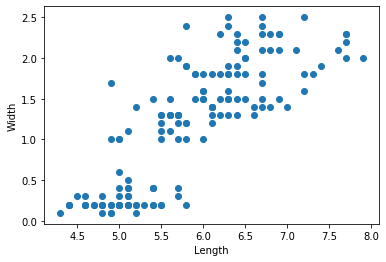

In [10]:
# Visualize the data using scatter plot
plt.plot()
plt.title = ('Iris Dataset')
plt.xlabel('Length')
plt.ylabel('Width')
plt.scatter(SL,PW)
plt.show()

In [11]:
# Convert columns X (Sepal Length)and Y (Petal Widht) into zip list and further convert it into numpy array.
Z= np.array(list(zip(SL, PW)))

### Elbow Method to find out Optimum number of clusters for K-means

Now let us see what is an Elbow method and it's significance. Elbow method helps to figure out optimum number of custers required for classification of groups using K-Means. We have already seen that we are provided with three species so in this case its pretty clear that there will be 3 clusters. But there are scenarios where large size of data is provided and it so not that staright forward to take a gusse that this number will classify our data into optimum groups. That's why elbow method is very important.

[188.73826666666668, 59.90948037790699, 32.726526159026164, 24.692315076398454, 19.719652032520326, 15.9620858974359, 12.791730769230771, 10.978611111111114, 9.509988976451826, 7.931274899617291]


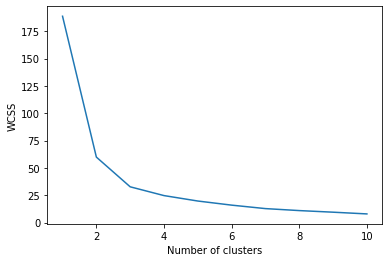

In [12]:
#Finding the optimum number of clusters for k-means classification

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
    
print(wcss)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title = ('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

From the above graph you can now easily predict the reason behind the name **Elbow Method**, the optimum number of cluster is where the elbow occurs. In this case it is betwwen 2 and 4, therefore 3 clusters will be needed for the classification.This occurs when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

### Initialisation by generating random clusters

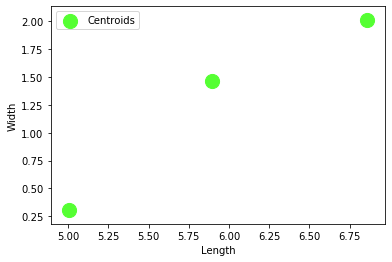

In [13]:
kmeans = KMeans(n_clusters=3).fit(Z)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = '#55FF33', label = 'Centroids')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

### Applying K-Means Clustering

In [14]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(Z)

### Visualizing the cluster

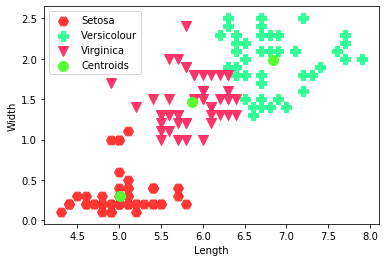

In [34]:
#Visualising the clusters
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = '#FF3633', label = 'Setosa', marker = 'H')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = '#33FF99', label = 'Versicolour', marker = 'P')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = '#ff3368', label = 'Virginica', marker = 'v')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = '#55FF33', label = 'Centroids')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title = ('Iris Data Classification')
plt.legend()

So, thats how we have classified the iris species into three groups depending on their sepal length and the petal width using K-means clustering algorithm.